# Part I - Fordgobike Data Exploration
## by Hassan Abdihakin

## Introduction
> the fordgobike dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. contains 183412 rows 16 columns. among the columns are duration_sec,start_time,start_station_latitude,bike_share_for_all_trip,member_gender and age. for furher understanding on the data the link is here https://www.google.com/url?q=https%3A%2F%2Fvideo.udacity-data.com%2Ftopher%2F2020%2FOctober%2F5f91cf38_201902-fordgobike-tripdata%2F201902-fordgobike-tripdata.csv&sa=D&source=docs




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
# Load in your dataset  and saving in varaible df
df=pd.read_csv('/Users/abdihakinhassan/Desktop/Data_viz/fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(5))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

## Cleaning Data


before we do any thing , lets just tweak the data and correct some data qualities issues.

1.start_time should be date type

2.end_time should be date type

3.create new column called duration_minutes

4.create a column age from member_birth_year column

5.member gender and user_type should be categorical

6.drop unneccessary columns

7.create columns of start_time_hour,end_time_hour,day_name

8.drop nulls

9.only take age, duration data that is below 80 and 60 respectively.

In [4]:
from datetime import datetime, date
df['start_time']=pd.to_datetime(df.start_time)
df['end_time']=pd.to_datetime(df.end_time)
def tweak_df(df):
    return(df
          .assign(
              
              member_birth_year=pd.to_datetime(df.member_birth_year),
              duration_minutes=df.duration_sec.apply(lambda x: x/60),
              age=datetime.now().year-df.member_birth_year,
              start_time_hour=df.start_time.dt.time,
              end_time_hour=df.end_time.dt.time,
              start_day_name=df.start_time.dt.day_name()
              
          )
            .dropna() 
          .astype({
            'user_type':'category',
            'member_gender':'category',
            'age':'int'
            
            
        }
        
        
        )

          )

df_clean=tweak_df(df)

In [5]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,age,start_time_hour,end_time_hour,start_day_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1970-01-01 00:00:00.000001984,Male,No,869.750000,38,17:32:10.145000,08:01:55.975000,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1970-01-01 00:00:00.000001972,Male,No,1030.900000,50,12:13:13.218000,05:24:08.146000,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1970-01-01 00:00:00.000001989,Other,No,608.166667,33,17:54:26.010000,04:02:36.842000,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1970-01-01 00:00:00.000001974,Male,Yes,26.416667,48,23:54:18.549000,00:20:44.074000,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1970-01-01 00:00:00.000001959,Male,No,29.883333,63,23:49:58.632000,00:19:51.760000,Thursday


### What is the structure of your dataset?

the data set contains 183412 raws and 16 columns among the columns are(duration_sec,start_time,start_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year and member_gender. started_time and end_time are date type columns while user_type should be categerocal of either member or customer as well the member_gender.some data types are in other form however the general look of the data sets seems to to be satisfying for the purpose of this project. 

### What is/are the main feature(s) of interest in your dataset?

i'm in interested in understanding the relationship between number of trips  and the user type. i also want to find that, how does being  a costomer or a substriber influences the number of duration of a trip. does days of the week have relationship with the number of trips. to find answer  to these questions, i will have create new features and use existing ones and dig down to get insights for the above sated questions. below are the features that are of interest from the dataset.
  * user_type
  * member_gender
  * duration_hours 
  * start_day_name
  * Age



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I assume duration of the ride and type of user have strong correlation on the number of trips.i suspect that month and days of the week,time of day have influence of the total number of trips. Age also influences the number of trips made by uer type and their gender. i expect males to make most of the trips as men tendto use more on rides than any other gender.


## Univariate Exploration



In [6]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,174952.0,704.002744,1642.204905,61.000000,323.000000,510.000000,789.000000,84548.000000
start_station_id,174952.0,139.002126,111.648819,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,174952.0,37.771220,0.100391,37.317298,37.770407,37.780760,37.797320,37.880222
start_station_longitude,174952.0,-122.351760,0.117732,-122.453704,-122.411901,-122.398279,-122.283093,-121.874119
end_station_id,174952.0,136.604486,111.335635,3.000000,44.000000,101.000000,238.000000,398.000000
end_station_latitude,174952.0,37.771414,0.100295,37.317298,37.770407,37.781010,37.797673,37.880222
end_station_longitude,174952.0,-122.351335,0.117294,-122.453704,-122.411647,-122.397437,-122.286533,-121.874119
bike_id,174952.0,4482.587555,1659.195937,11.000000,3799.000000,4960.000000,5505.000000,6645.000000
duration_minutes,174952.0,11.733379,27.370082,1.016667,5.383333,8.500000,13.150000,1409.133333
age,174952.0,37.196865,10.118731,21.000000,30.000000,35.000000,42.000000,144.000000


In [7]:
reset_color=sb.color_palette()[0] # rseting color to avoid distraction

#### Before we start exloring our interest feature. let's drop some unnecessary columns plus get riding of outlier .

In [8]:
def tweak_df(df):
    return(df_clean
         .drop(columns=['member_birth_year'])
         
          .query("duration_minutes<60") # get duartion under 60
            .query("age<80") # get age under 80
           .reset_index()
           .drop(columns=['index']) # drop index
          )


df_clean=tweak_df(df)

In [9]:
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_minutes,age,start_time_hour,end_time_hour,start_day_name
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,26.416667,48,23:54:18.549000,00:20:44.074000,Thursday
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,29.883333,63,23:49:58.632000,00:19:51.760000,Thursday
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,Female,No,19.116667,39,23:55:35.104000,00:14:42.588000,Thursday
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,Male,No,26.916667,33,23:41:06.766000,00:08:02.756000,Thursday
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,Other,No,26.166667,34,23:41:48.790000,00:07:59.715000,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173329,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,Male,No,8.000000,26,00:04:49.724000,00:12:50.034000,Friday
173330,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,Male,No,5.216667,38,00:05:34.744000,00:10:48.502000,Friday
173331,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,Male,Yes,2.350000,32,00:06:05.549000,00:08:27.220000,Friday
173332,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,Male,No,2.316667,34,00:05:34.360000,00:07:54.287000,Friday


# Question1: how does the distrubution of  duration in minutes look so as to grasp the nature of the distribution. 

In [10]:
np.log(df_clean.duration_minutes.describe())

count    12.062976
mean      2.333267
std       2.000881
min       0.016529
25%       1.680207
50%       2.134166
75%       2.564949
max       4.093233
Name: duration_minutes, dtype: float64

### Visualization

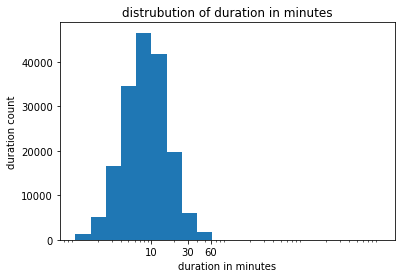

In [11]:
# setting log scale so as to avoid longer tail or streched distribution
bins = 10 ** np.arange(0, 4+0.1, 0.2)
plt.hist(data=df_clean, x='duration_minutes', bins=bins);
ticks = [ 10, 30, 60]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.title('distrubution of duration in minutes')
plt.xlabel('duration in minutes')
plt.ylabel('duration count');
plt.xscale('log')

plt.xticks(ticks, labels);

#### Observation:the distrinution is right skewed and most of the trips took under 13 minutes. on avarage, every signle trip took atleast 1 minute. however there are some trips that took almost an hour and that could be influenced by starting latitiude and ending latitude.

# Question2: let's see the histogram data in a box plot to see visual picture of the 5-number summary.

##### Visualization

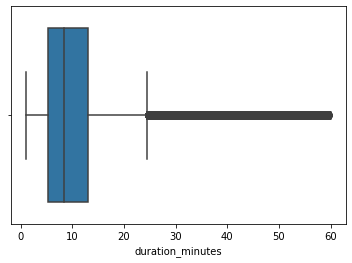

In [12]:
# let's see the histogram data in a box plot to see visual picture of the 5-number summary.

sb.boxplot(df_clean['duration_minutes'])

plt.show()

##### Observation: the box plot shows that  most of the trips took 6-13 minutes. Avaragely, every signle trip took atleast 1 minute. however there are some trips that took almost an hour and above that could be influenced by features such as starting latitiude and ending latitude. but needs further investigation on why some trips lasts longer than others.

# Question3: observing the distribution of Age data

### Visualization

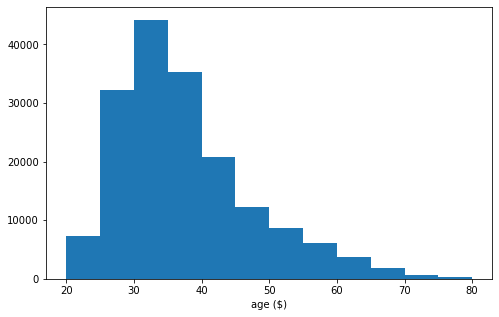

In [13]:
# let's see the distribution of Age data
binsize = 5
bins = np.arange(20, df_clean['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'age', bins = bins)
plt.xlabel('age ($)')
plt.show()

observation:the distribtion of the age data is right skewed and the people who made the trips are largely from  approximately 21-40 years.most of the  people  who made the trip were below 50.let's see the histogram data in a box plot to see visual picture of the 5-number summary.

# Question4: let's see the histogram data in a box plot to see visual picture of the 5-number summary

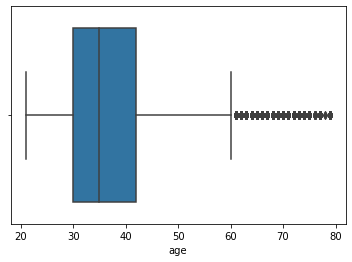

In [14]:
# let's see the histogram data in a box plot to see visual picture of the 5-number summary.
sb.boxplot(df_clean['age'])

plt.show()

##### observation:the distribtion of the age data is right skewed and the people who made the trips are largely from  approximately 21-40 years.most of the  people  who made the trip were below 50. as the age grows the trips decrement and this could be people are sickening while they age. however this could also mean that people who are between 21-42 years are either students or workers.there is significat ouliers and it's not logically reasonable for a person who's age is above 100 to  ride a bicycle. it's like that there was some errors when the data was been recorded.

# Question5: how is day of the week impact the total trips.

### Visualization

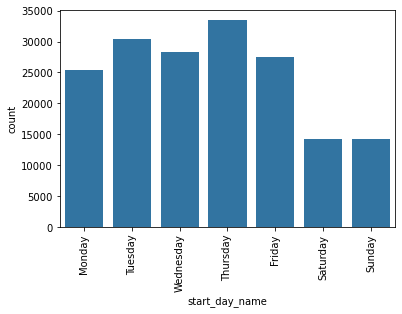

In [15]:
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df_clean, x='start_day_name',color=reset_color,order=order)
plt.xticks(rotation=90);

#### Observation: there seems to be a good relationship between the weekdays and number of rides. this could be an effect of user behaviour it seems some users are employers,students and while other seem to be using the bikes for pleasure. to find which type of user mostly rides on weekdays as opposed to weekends. we need to further study user types. 

# Question: how do differnt User types inpact the overall trips. 

In [16]:
# let's get the group under study that is Subscriber by first grouping the data into user_type
# then get the Subscribers data
# after that the Subscribers data is assigned to df_member variable
# also the customer is assigned to df_Cutomer Vaiarible
df_member=df_clean.groupby('user_type').get_group('Subscriber')
df_customer=df_clean.groupby('user_type').get_group('Customer')


In [17]:
# we have 158386 Subscribers and 16566 Customers
df_clean.user_type.value_counts()

Subscriber    157483
Customer       15851
Name: user_type, dtype: int64

### Visualization

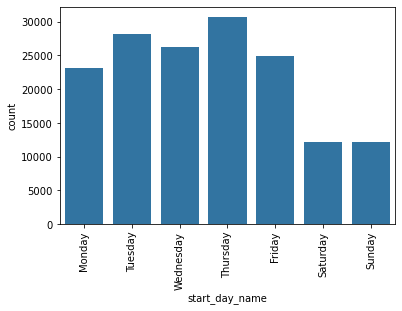

In [18]:
# visualizing subsrcribers trips
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df_member, x='start_day_name',color=reset_color,order=order)
plt.xticks(rotation=90);

#### Observation: days of the week has direct impact on member trips as the days Thursday and tuesday are mad more that 27000 trips. this could be effect on factors such as work, school and other activites such as gym and the statement is supported by the fewer trips on sunday and saturday as people seem to doing nothing on these days,

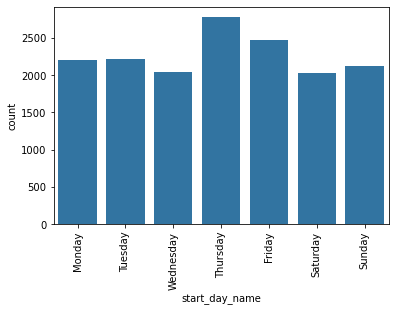

In [19]:
# visualizing customers trips
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] # using it for ordering by index
sb.countplot(data=df_customer, x='start_day_name',color=reset_color,order=order)
plt.xticks(rotation=90);

#### Observation:Both Customers and Subscribers ride mostly on Thursdays however customers seem to be riding most of the week as number of rides for subscribers decrement on weekends. to find why we need to investigate other features such as latatude and longtatude. which i will cover on Multivariate section.

# Question:let's see how gender  impacts on the number of trips

#### Visualization

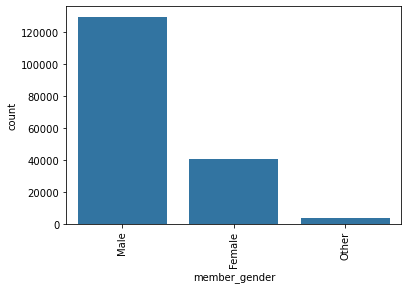

In [20]:
# we will contnue using the grouping of users in their respective variables done in above section.
# But first let's see the overal impact of gender to the total trips 
order = df_clean['member_gender'].value_counts().index
sb.countplot(data=df_clean, x='member_gender',color=reset_color,order=order)
plt.xticks(rotation=90);

#### Observation: male seems to be the dominant gender that rides most of the trips while female comes next and others make the least trip riders.

# Question: how much do female subsribers impact the total trips per week made by the subsribers group.

### Visualization

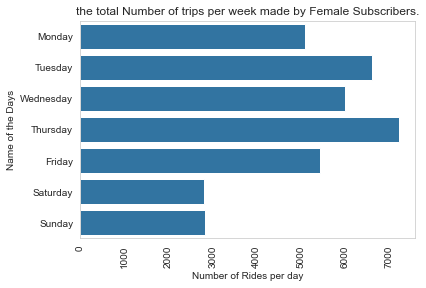

In [21]:
# get female group from the above df_member grouped data and assign to df_member_females then plot.
sb.set_style("whitegrid", {'axes.grid' : False})
df_member_females=df_member.query("member_gender=='Female'")['start_day_name']

order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] # using it for ordering by index
sb.countplot(data=df_member, y=df_member_females,color=reset_color,order=order)
plt.xticks(rotation=90);
plt.title('the total Number of trips per week made by Female Subscribers.')
plt.ylabel('Name of the Days')
plt.xlabel('Number of Rides per day')
plt.show();

#### Observation: Female subs are do take most of the trips on thursday,tuesday and wednesday.they seem to be workers,students or early morning exercise.let's compare them with female customers.

# Question: how much do female subsribers impact the total trips per week made by the Customers Group.

### Visualization

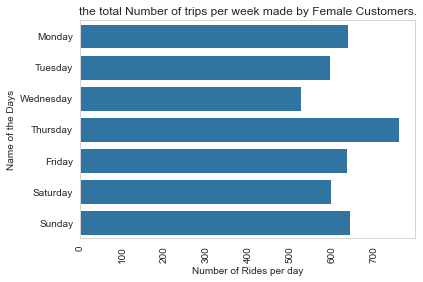

In [22]:
# get female group from the above df_customer grouped data and assign to df_sub_females then plot.
sb.set_style("whitegrid", {'axes.grid' : False})
df_sub_females=df_customer.query("member_gender=='Female'")['start_day_name']

order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] # using it for ordering by index
sb.countplot(data=df_member, y=df_sub_females,color=reset_color,order=order)
plt.xticks(rotation=90);
plt.title('the total Number of trips per week made by Female Customers.')
plt.ylabel('Name of the Days')
plt.xlabel('Number of Rides per day')
plt.show();

#### Observation: female costomer has large impcted on the total trips made by customer per week.they more likely make their trips significantly on Thursdays and sundays followed by monday. this could be affected by factors such as climate and customer behaviour. however other features such as longtitude and latitude could tell more about these female customer.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  I Started with duration of trips in hours and found that the data distrubution was right skewed most trips do take between 1 min to 13 mins. 75% of the trips were under 13 minutes. however they were some trips which took almost 24 hours that allowed the data to have a long tail. regarding, i transformed the data, however the question on why certain trips take long hours is still answerd looking forward to their solution on next section by compating with other features.

> I continued exploring with feature age and found out that 75% of the people aged below 42 and above 21. most of the people are the aged 21-35. however there were extremly outliers which lead to long tail distrubtion and becouse of that i prformed transformation. t's not logically reasonable for a person who's age is above 100 to  ride a bicycle. it's like that there was some errors when the data was been recorded

> Finally i studied user types and their contribution of the overal trips. males seems to be the dominant gender that rides most of the trips while female comes next and others make the least trip riders. i further investigated on how female customers and subsrcibers inlfunced the total trips per week.Both Customers and Subscribers ride mostly on Thursdays however customers seem to be riding most of the week as number of rides for subscribers decrement on weekends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The feature of age had significat outliers that was bound to human error at the time of recording, regarding i removed those individuals who aged 50 as the data indicates more that 75% of trips were made by people below 42 years, removing them would not affect the purpose of the project. also duration of trip above 60 minutes were droped so that significat outliers do not strech or affect the data.

## Bivariate Exploration



# Question: let's see the relationship between age and user type

### visualization

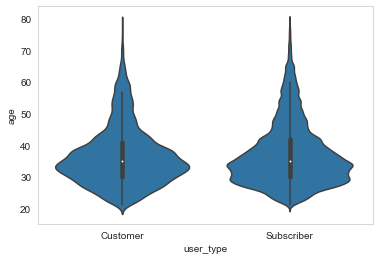

In [23]:
# since one feature is quantitative and the other is categorical, we use violin plot
sb.violinplot(data=df_clean, x='user_type', y='age',color=reset_color); 

#### Observation: 75 % of the trips were made by people who are below aged 42 and the user types seems to have similar age groups. this can be said that the company has overall clients who are between 21 to 42 who generate most revenues.

# Question: let's see the relationship between age and members gender

### visualization

(14.986223057140833, 84.31939817034927)

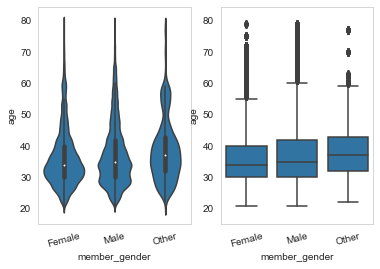

In [24]:

plt.subplot(1, 2, 1)
# plot of the left is: violin plot
ax1 = sb.violinplot(data=df_clean, x='member_gender', y='age', color=reset_color)
plt.xticks(rotation=15);

# plot of the right is: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='member_gender', y='age', color=reset_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) 

#### Observation: members have approximately same mean and this supports the above observation that regardless of gender type the companies clients revenue comes from people from between 21-42.others who did not or forget to identify themselves with male or female have greater mean than the rest of the group.

# Question: where do the higest  cilients of the company come from interms of gender.

### visualization

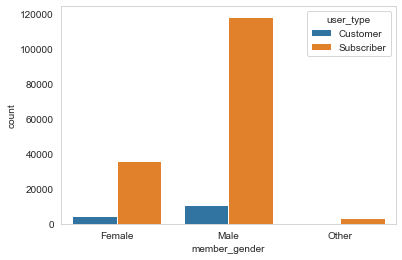

In [25]:
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type');

#### Observation: females contribute less on customers but females subs are close to 40k. others are largely subsccribers while male are the highest controbuters of the overal subscribers and the highest on customers. this can be said that men are the trip makers of the company and bring the highest revenue.

In [26]:
# Use group_by() and size() to get the number of gender
all_member=df_clean.groupby(['member_gender', 'user_type']).size()
all_members=all_member.reset_index(name='count') # resing the index to be dataframe
all_members=all_members.pivot(index = 'member_gender', columns = 'user_type', values = 'count')# pivot and changing coloumn names

# Question: let's see user type's total trips with correspondet to their gender

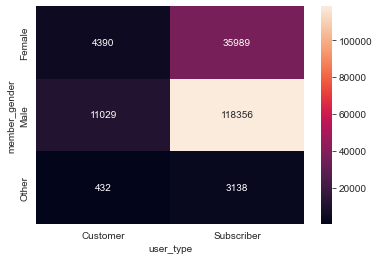

In [27]:
sb.heatmap(all_members, annot = True, fmt = 'd');

#### Observation: the heatmap shows controbution of clients are their gender type. 432 others come from customers and 3138 from subscribers.male 119=029 from customers and 118356 from subs while females 35989 emerge from subs and 4390 from customers. this confirms my assumtion of most revenue are generated by males and that most trips are made by males.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> members have approximately same mean and this supports the above observation that regardless of gender type the companies clients revenue comes from people from between 21-42.i further invetigated on this and found out that male were the most customers and subscribers 4390 and 35989 respectivly.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> after studying cutomer and subscribers,that it confirms my assumtion of most revenue are generated by males and that most trips are made by males.

## Multivariate Exploration



# Question: what is the average age  of user type's gender

### visualization

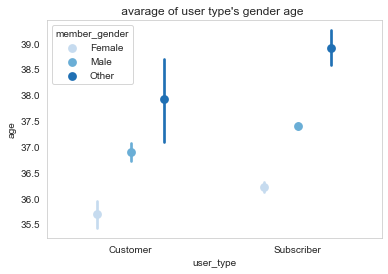

In [28]:

ax = sb.pointplot(data = df_clean, x = 'user_type', y = 'age', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title(" avarage of user type's gender age  ")
plt.ylabel('age')



plt.show();

#### Observation: Average of customer's female age is around 36, while Average of males age os 37 and other make around 38. this assumtion was expected as always other type has greater mean when plotted with BoxPLot.

### let's see average  of user type's gender age in Box plot.

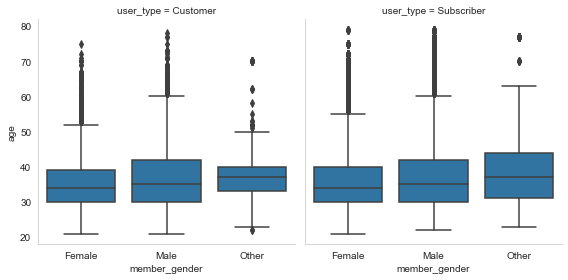

In [29]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'age');

#### Observation: as expected the overall clients of the trip riders are below 42 and above 21.the highest trips were made by males follwed by females.

# Question: let's see the number of duration of trips made by member the gender feature

### Visaulization

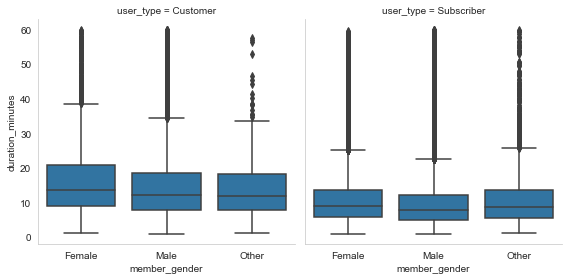

In [30]:

g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'duration_minutes');

#### Observation: to my suprise cutomers are making longer duration trips than subscribers and the gender that makes longest duration in customers are females. this could however be slow riding of females due to their nature of care or females do ride in distance.

# Question: comparing the number of total trips made by each gender

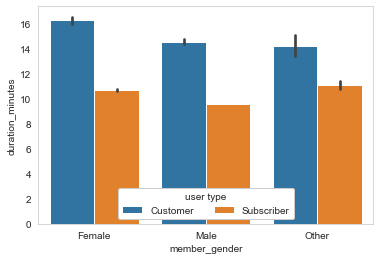

In [31]:
ax = sb.barplot(data = df_clean, x = 'member_gender', y = 'duration_minutes', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user type');

#### Observation: Finally  cutomers make longest duration. and the longest duration in a trip is made by  females.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> subscribers make an average trip of below 12 while cutomers made an average of above 15 minutes.Other Gender types are the oldest who have made a trip on average of 11 minutes duration trip

### Were there any interesting or surprising interactions between features?

> To My suprise cutomers are making longer duration trips than subscribers and the gender that makes longest duration in customers are females. this could however be slow riding of females due to their nature of care or females do ride in distance.

## Conclusions
> my main features of study were age,duration_mintes, user_type and member_gender.i first studied on each of them to understand their nature of distrubution. most of them were right skewed with stretched outliers which i later dropped. when started  comparing against each other i found that age  aginst user type. subscribers are the had oldest trip makers on average around 38 by specific group named others.the longest duration trips from cutomers group were made by females and this could be due to their nature of care or maybe females do ride in distance. however the question on why females ride lenth was longer than any other gender needs to be further investigated.